## q1 Plot the Radial Wave function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.special import legendre
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import factorial, genlaguerre

C:\Users\shrinath\AppData\Local\Temp\ipykernel_27072\1340691908.py:10: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  R_n = (2 / (n*a0))**(3/2) * np.sqrt(np.math.factorial(n-1)/(2*n*np.math.factorial(2*n-1))) * np.exp(-r/(n*a0)) * lagrange_interpolated(r/(n*a0))


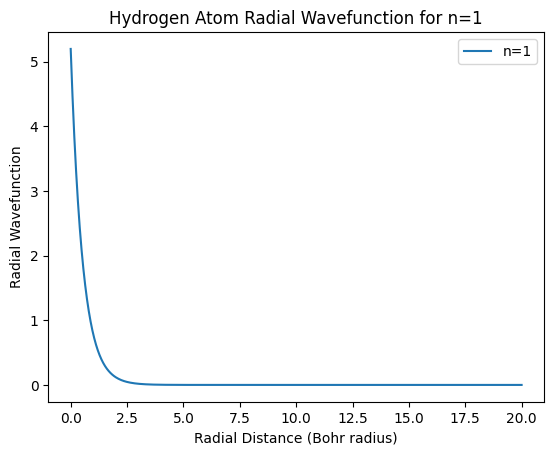

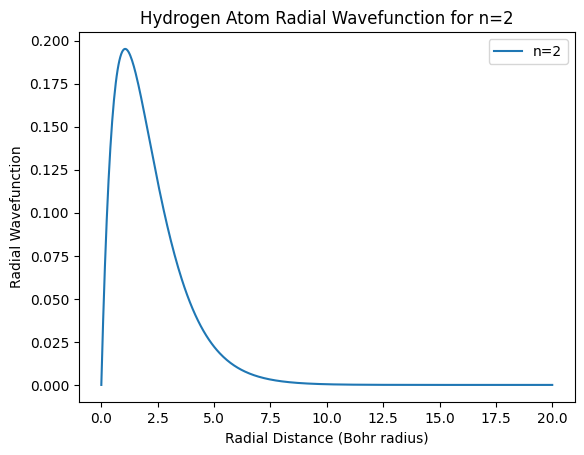

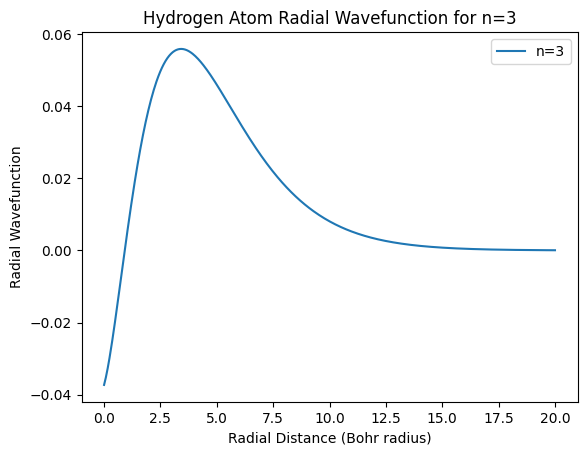

In [24]:

def hydrogen_radial_wavefunction(r, n):
    # Constants
    a0 = 0.529  # Bohr radius in Angstrom
    leg_poly = legendre(n-1)

    lagrange_nodes = np.linspace(-1, 1, n)
    lagrange_coefficients = leg_poly(lagrange_nodes)
    lagrange_interpolated = lagrange(lagrange_nodes, lagrange_coefficients)

    R_n = (2 / (n*a0))**(3/2) * np.sqrt(np.math.factorial(n-1)/(2*n*np.math.factorial(2*n-1))) * np.exp(-r/(n*a0)) * lagrange_interpolated(r/(n*a0))

    return R_n

def plot_radial_wavefunction_2d(n):
    r = np.linspace(0, 20, 500)
    wavefunction = hydrogen_radial_wavefunction(r, n)

    plt.plot(r, wavefunction, label=f'n={n}')

    plt.xlabel('Radial Distance (Bohr radius)')
    plt.ylabel('Radial Wavefunction')
    plt.title('Hydrogen Atom Radial Wavefunction for n={}'.format(n))
    plt.legend()

    plt.show()

i=int(input("enter the number of times you want to test"))
while i>0:
    n = int(input("enter the quantum number for the wave function you want"))
    plot_radial_wavefunction_2d(n)
    i = i-1
#done

## Q2 generate plots for sci^2 n = 1,2 and 3 and all values of l and m

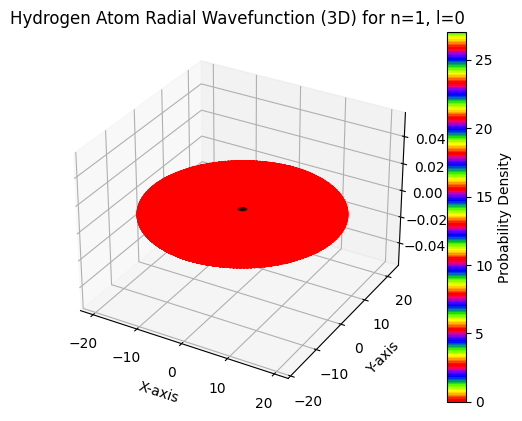

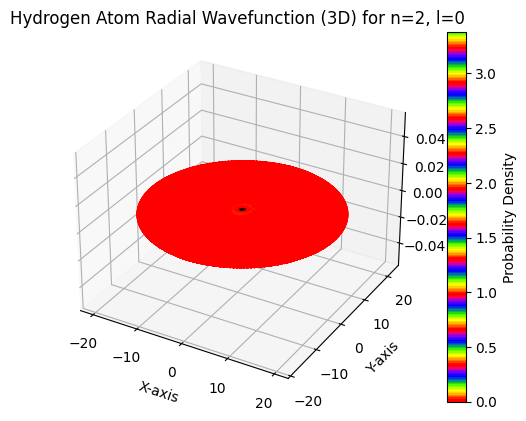

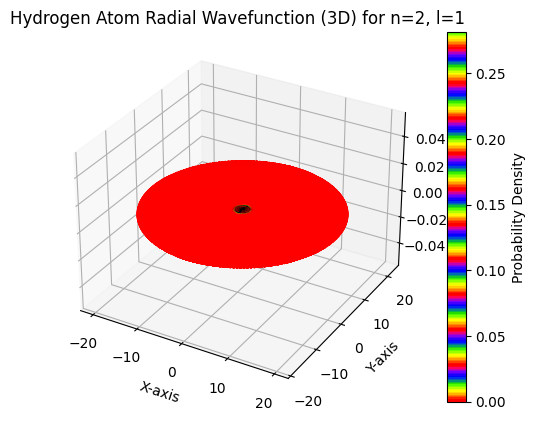

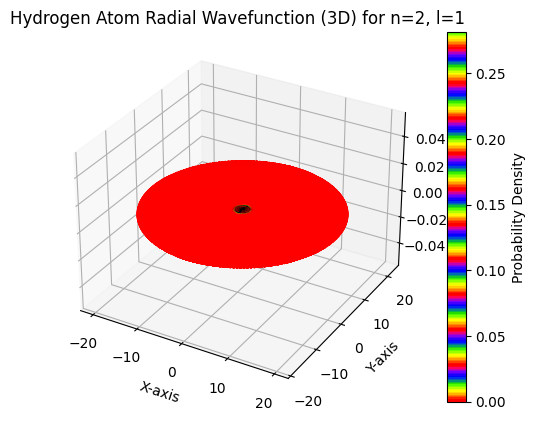

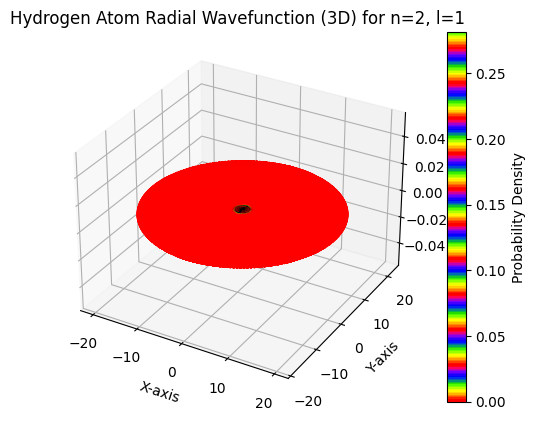

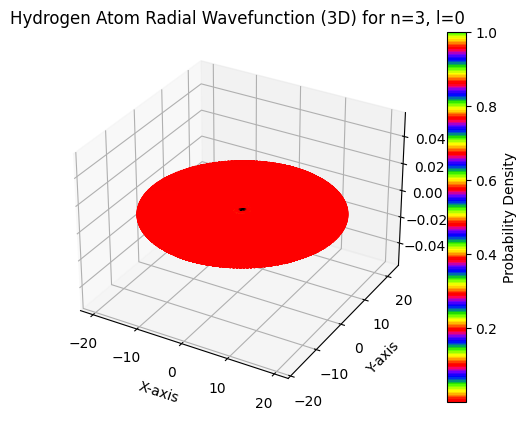

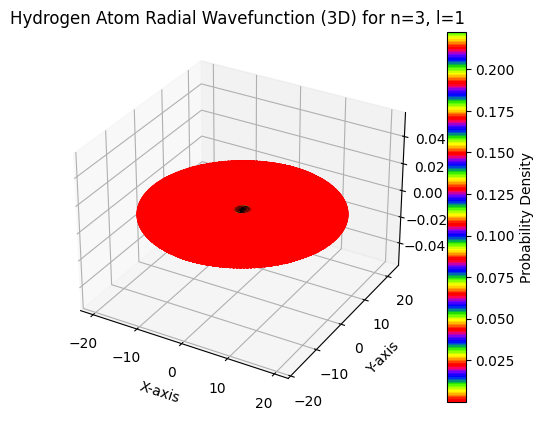

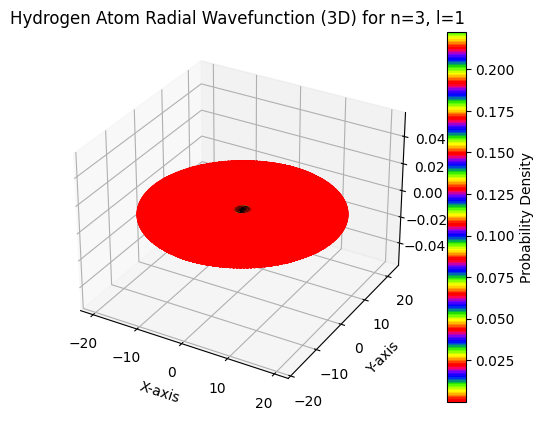

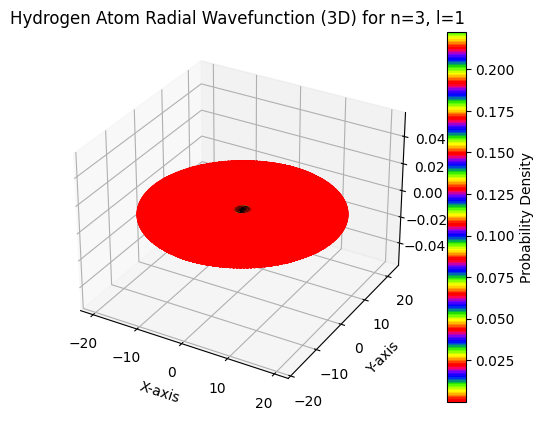

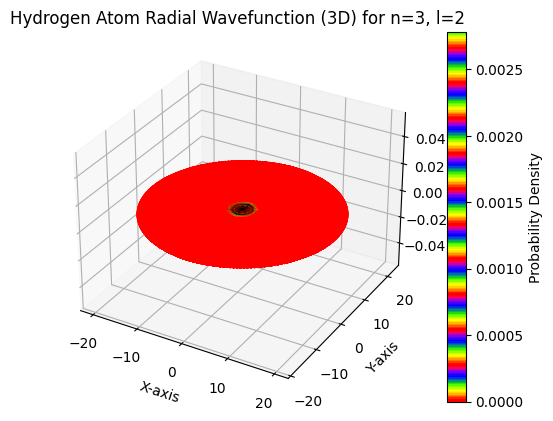

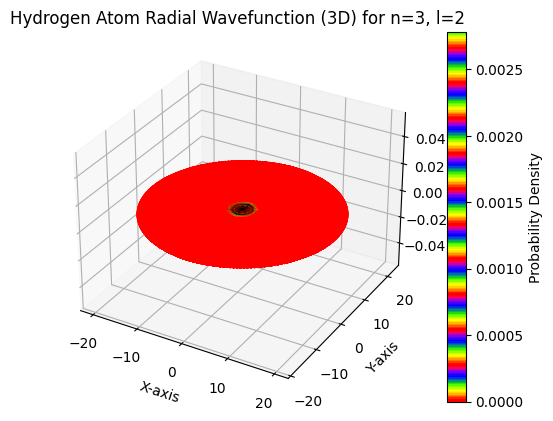

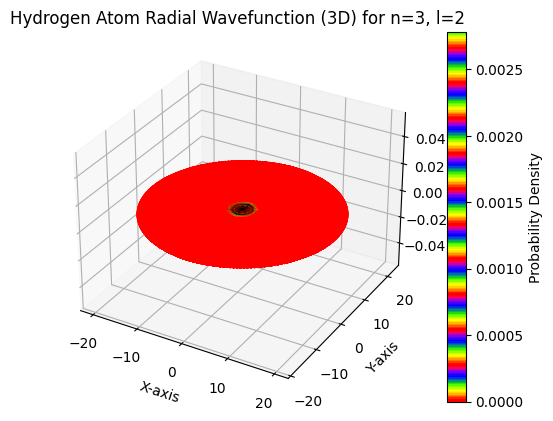

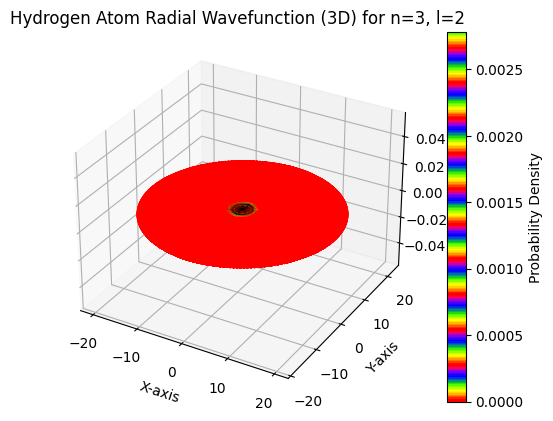

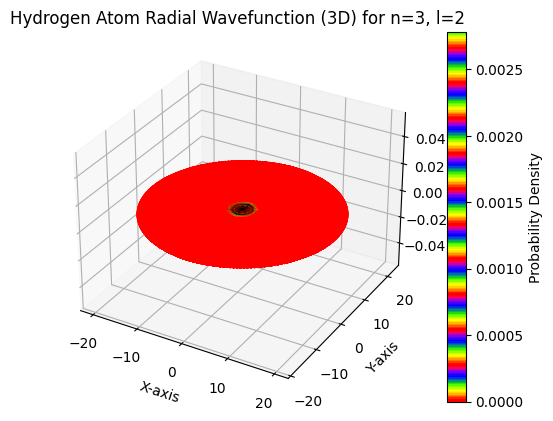

In [3]:
def radial_wavefunction(r, n, l):

    a0 = 0.529  
    prefactor = np.sqrt((2 / (n * a0))**3 * factorial(n - l - 1) / (2 * n * factorial(n + l)))
    exponential_term = np.exp(-r / (n * a0))
    laguerre_term = genlaguerre(n - l - 1, 2 * l + 1)(2 * r / (n * a0))

    R_nl = prefactor * exponential_term * laguerre_term

    return R_nl**2 

def plot_radial_wavefunction_3d(n, l, z_offset=2):
    r = np.linspace(0, 20, 500)
    theta = np.linspace(0, np.pi, 100)
    phi = np.linspace(0, 2 * np.pi, 100)
    for n in range(1, nq + 1):
        for l in range(0, n):
            for m in range(-l, l + 1):
                R, Theta, Phi = np.meshgrid(r, theta, phi, indexing='ij')
                radial_wavefunction_values = radial_wavefunction(R, n, l)
                X = R * np.sin(Theta) * np.cos(Phi)
                Y = R * np.sin(Theta) * np.sin(Phi)
                Z = R * np.cos(Theta) + z_offset

                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                sc = ax.scatter(Y, Z, c=radial_wavefunction_values, cmap='prism', s=5)

                ax.set_xlabel('X-axis')
                ax.set_ylabel('Y-axis')
                ax.set_zlabel('Z-axis')
                ax.set_title(f'Hydrogen Atom Radial Wavefunction (3D) for n={n}, l={l}')
                cbar = fig.colorbar(sc, ax=ax, orientation='vertical')
                cbar.set_label('Probability Density')
                plt.show()
    
nq = int(input("enter n value"))
plot_radial_wavefunction_3d(nq, nq-1, z_offset=2)
